# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame 
mouse_study = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [31]:
# Checking the number of mice.
micen = mouse_study["Mouse ID"].nunique()
micen

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
badmouse = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
badmouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleanmouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
# Checking the number of mice in the clean DataFrame.
cleanmouse["Mouse ID"].nunique()

249

In [52]:
cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#SunS = cleanmouse("regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "variance", "std", "sem"])

SunS = pd.DataFrame({
    "Mean Tumor Volume": cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem(),
})

SunS

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
SunS = cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line
SunS = SunS.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

SunS

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

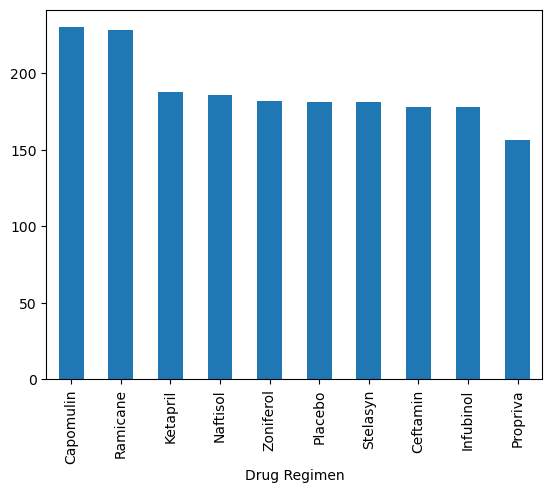

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleanmouse.groupby('Drug Regimen').size().sort_values(ascending=False)

drug_regimen_counts.plot.bar()

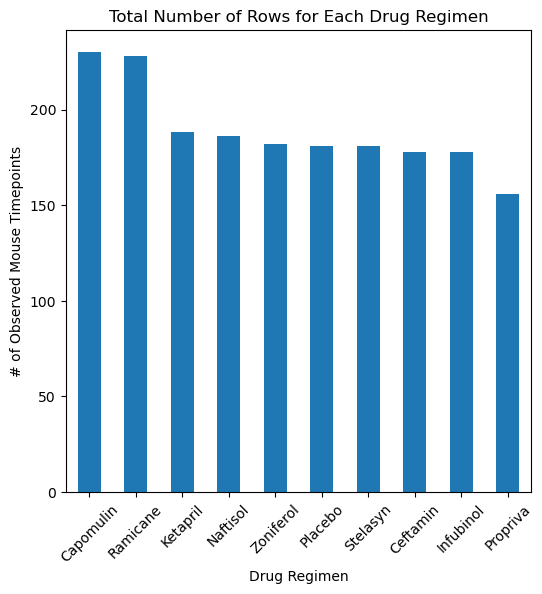

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_coundrug_regimen_counts = cleanmouse.groupby('Drug Regimen').size()
drug_regimen_counts.plot(kind='bar', figsize=(6, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

<Axes: >

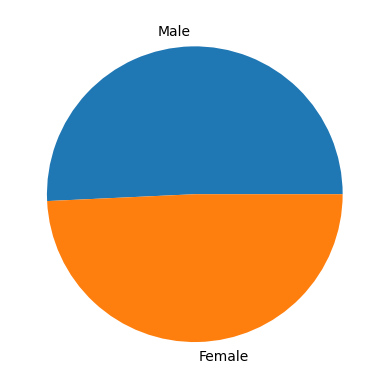

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_regimen_counts = cleanmouse.groupby('Sex').size().sort_values(ascending=False)
drug_regimen_counts.plot.pie()

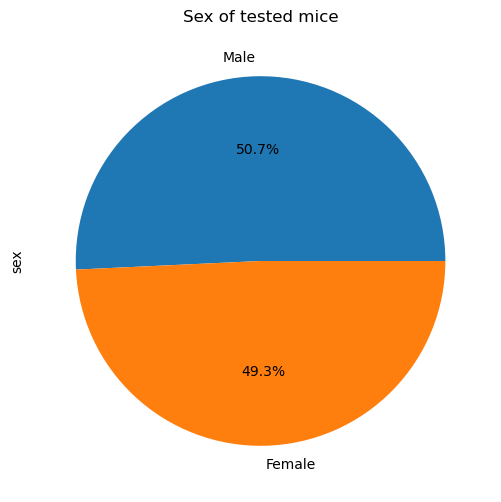

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_regimen_coundrug_regimen_counts = cleanmouse.groupby('Sex').size()
drug_regimen_counts.plot(kind='pie', figsize=(6, 6), autopct="%1.1f%%")
plt.title('Sex of tested mice')
plt.ylabel('sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleanmouseT = cleanmouse.groupby(["Mouse ID"])["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleanmouseOT = cleanmouse.merge(cleanmouseT, on="Mouse ID")
cleanmouseOT = cleanmouseOT.rename(columns={"Timepoint_y": "Final Time", "Timepoint_x": "Time"})
cleanmouseOT

,Mouse ID,Time,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Time
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1883,m601,25,33.118756,1,Capomulin,Male,22,17,45
1884,m601,30,31.758275,1,Capomulin,Male,22,17,45
1885,m601,35,30.834357,1,Capomulin,Male,22,17,45
1886,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [139]:
# Put treatments into a list for for loop (and later for plot labels)

capomulin = []
ramicane = []
infubinol = []
ceftamin = []

for index, row in cleanmouseOT.iterrows():
    if row["Time"] == row["Final Time"]:
        if row["Drug Regimen"] == "Capomulin":
            capomulin.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ramicane":
            ramicane.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Infubinol":
            infubinol.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ceftamin":
            ceftamin.append(row["Tumor Volume (mm3)"])


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

[61.38666032,
 46.78453491,
 64.29983003,
 48.72207785,
 57.91838132,
 55.74282869,
 67.74866174,
 64.72983655,
 68.59474498,
 59.85195552,
 61.84902336,
 52.92534846,
 45.0,
 67.52748237,
 47.7846818,
 45.0,
 68.92318457,
 62.99935619,
 64.63494887,
 45.0,
 61.43389223,
 56.05774909,
 59.74190064,
 64.19234114,
 45.0]

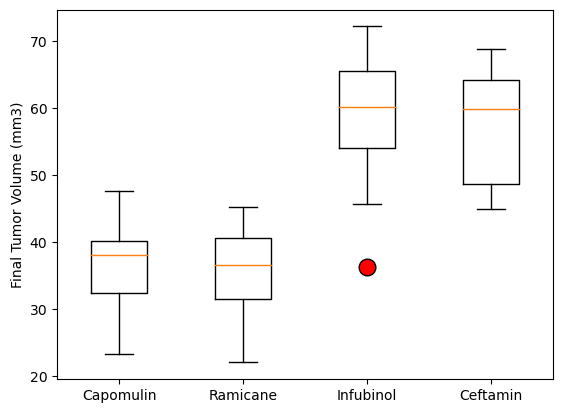

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

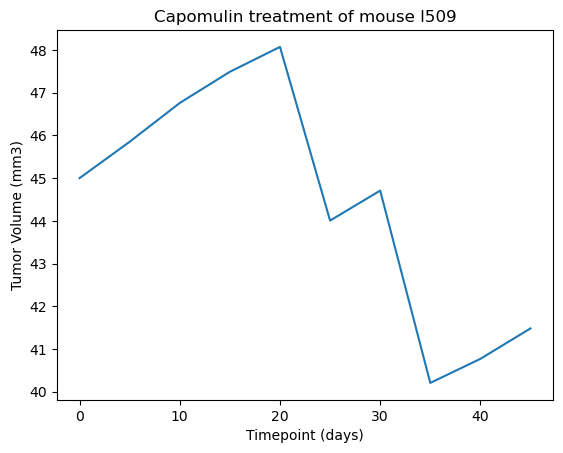

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


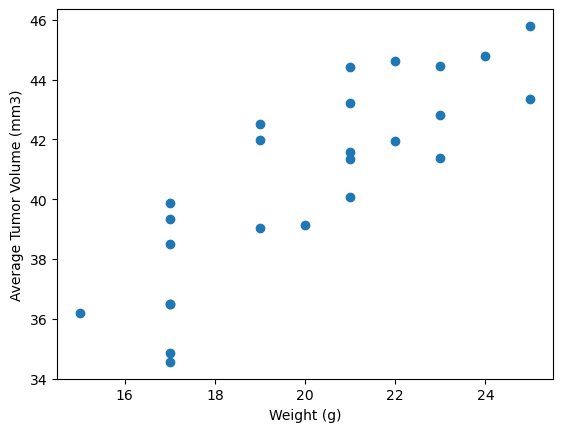

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


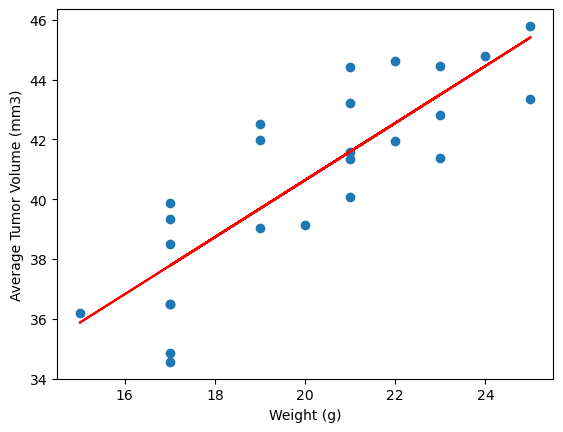

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
